In [ ]:
import pandas as pd

try:
    df_titanic = pd.read_csv('Titanic-Dataset.csv')
    display(df_titanic.head())
except FileNotFoundError:
    print("Error: 'Titanic-Dataset.csv' not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Data Shape
print("Data Shape:", df_titanic.shape)

# Data Types
print("\nData Types:\n", df_titanic.dtypes)

# Summary Statistics
print("\nSummary Statistics:\n", df_titanic.describe(include='all'))

# Missing Values
missing_values = df_titanic.isnull().sum()
missing_percentage = (missing_values / len(df_titanic)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing Values:\n", missing_df)

Data Shape: (891, 12)

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Summary Statistics:
         PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000

Survival Rate by Passenger Class:
 Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

Survival Rate by Gender:
 Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

Survival Rate by Age Group:
 Age_Group
Child          50.359712
Young Adult    35.555556
Adult          42.323651
Senior         34.375000
Name: Survived, dtype: float64

Survival Rate by Embarkation Point:
 Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

Correlation Matrix:
                Age      Fare     SibSp     Parch  Survived
Age       1.000000  0.096067 -0.308247 -0.189119 -0.077221
Fare      0.096067  1.000000  0.159651  0.216225  0.257307
SibSp    -0.308247  0.159651  1.000000  0.414838 -0.035322
Parch    -0.189119  0.216225  0.414838  1.000000  0.081629
Survived -0.077221  0.257307 -0.035322  0.081629  1.000000


<ipython-input-3-d6a384273a92>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = df_titanic.groupby('Age_Group')['Survived'].mean() * 100


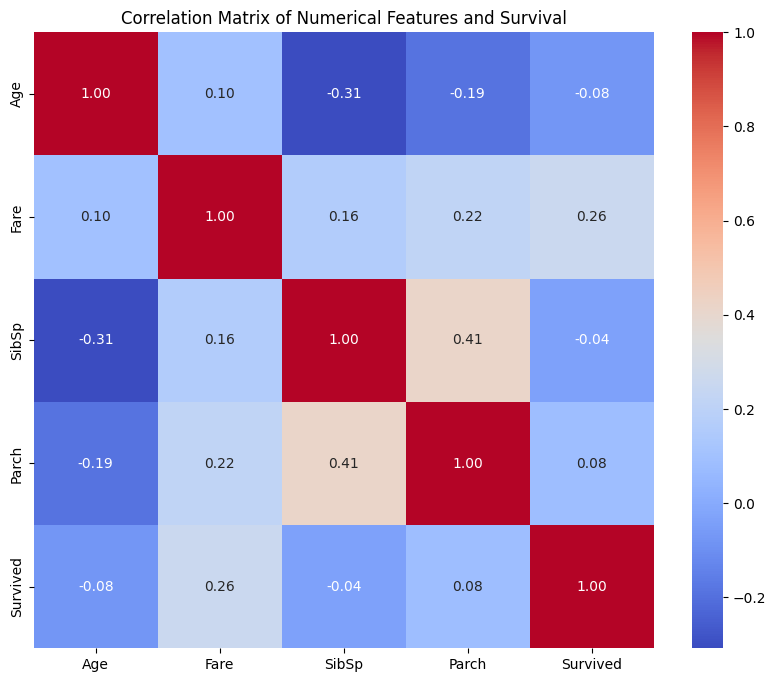

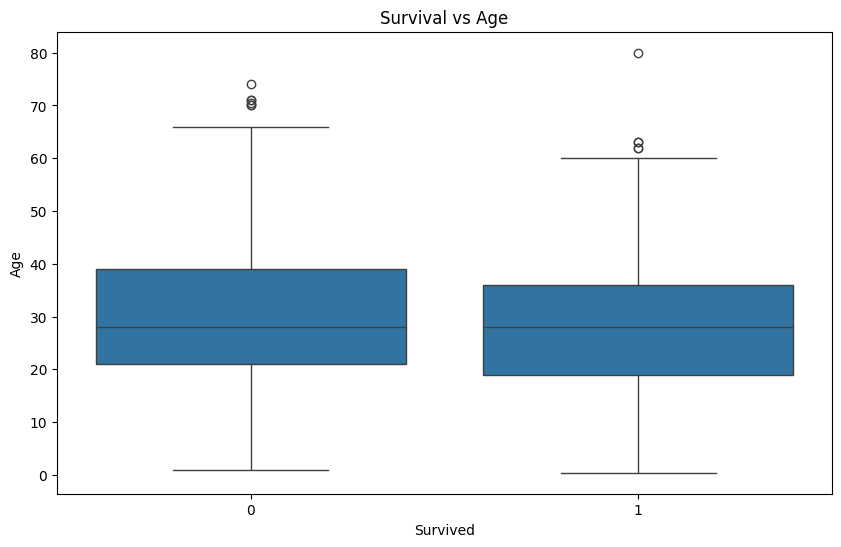

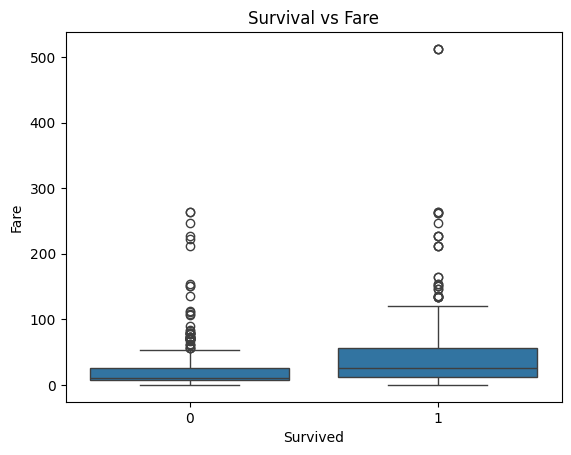

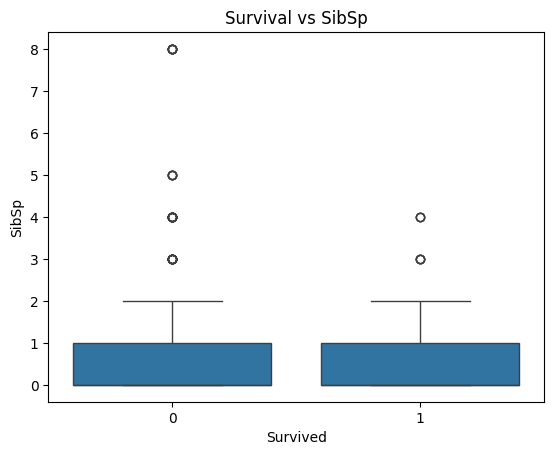

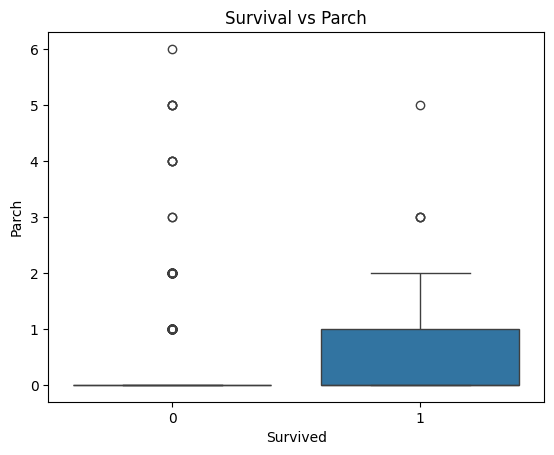

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Survival rate by passenger class
pclass_survival = df_titanic.groupby('Pclass')['Survived'].mean() * 100
print("Survival Rate by Passenger Class:\n", pclass_survival)

# Survival rate by gender
sex_survival = df_titanic.groupby('Sex')['Survived'].mean() * 100
print("\nSurvival Rate by Gender:\n", sex_survival)

# Survival rate by age group
df_titanic['Age_Group'] = pd.cut(df_titanic['Age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
age_group_survival = df_titanic.groupby('Age_Group')['Survived'].mean() * 100
print("\nSurvival Rate by Age Group:\n", age_group_survival)

# Survival rate by embarkation point
embarked_survival = df_titanic.groupby('Embarked')['Survived'].mean() * 100
print("\nSurvival Rate by Embarkation Point:\n", embarked_survival)

# Correlation between numerical features and survival
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
correlation_matrix = df_titanic[numerical_features + ['Survived']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Survival')
plt.show()

plt.figure(figsize=(10, 6))
for feature in numerical_features:
    sns.boxplot(x='Survived', y=feature, data=df_titanic)
    plt.title(f'Survival vs {feature}')
    plt.show()

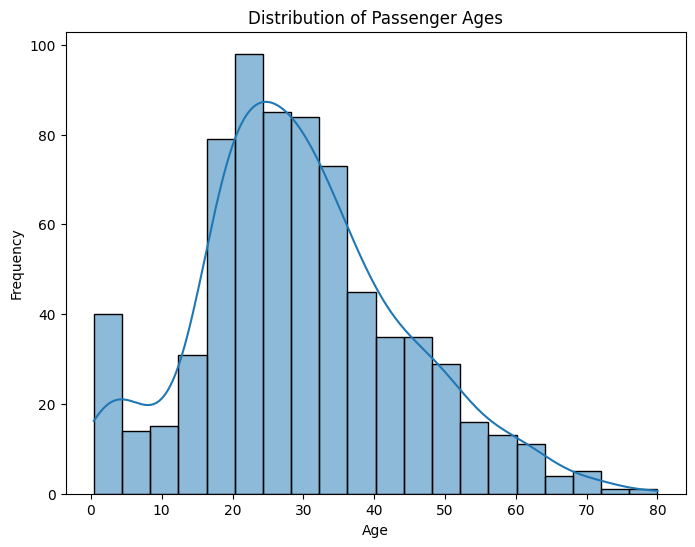

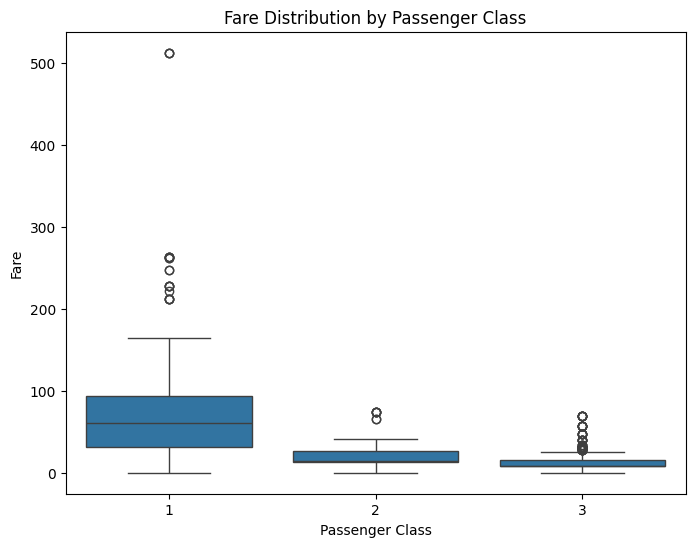

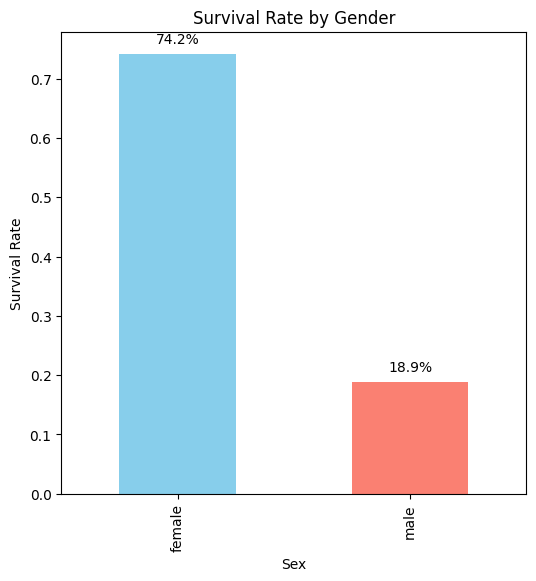

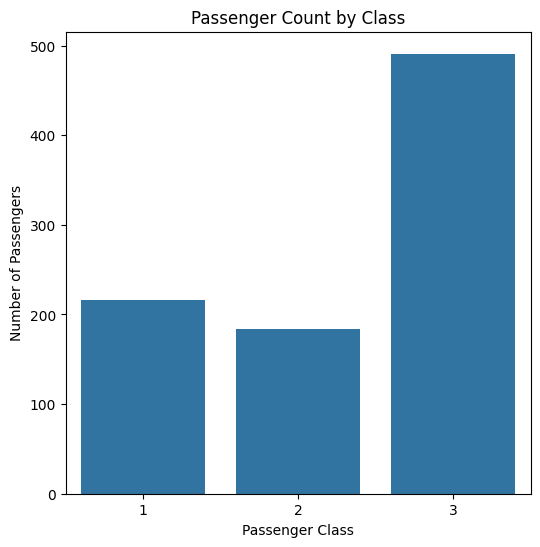

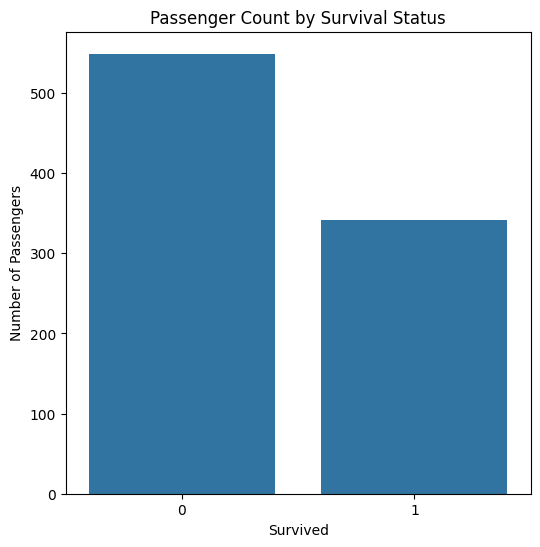

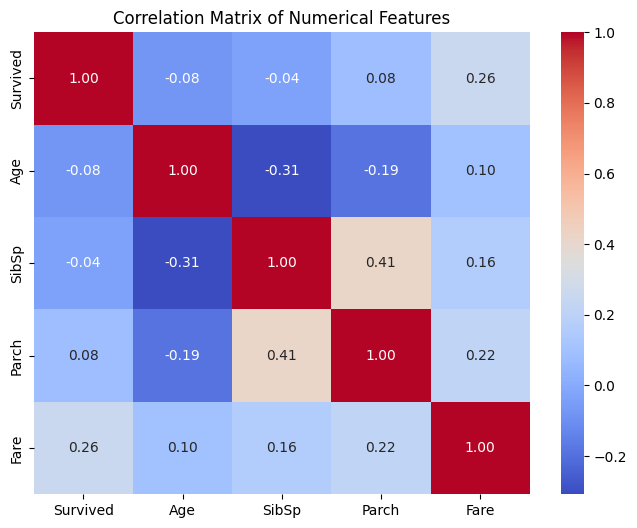

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram for 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(df_titanic['Age'].dropna(), kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Ages')
plt.show()

# 2. Box plot of 'Fare' by 'Pclass'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=df_titanic)
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.title('Fare Distribution by Passenger Class')
plt.show()

# 3. Bar chart of survival rate by gender
survival_by_sex = df_titanic.groupby('Sex')['Survived'].mean()
plt.figure(figsize=(6, 6))
ax = survival_by_sex.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

# 4. Count plot for 'Pclass'
plt.figure(figsize=(6, 6))
sns.countplot(x='Pclass', data=df_titanic)
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Passenger Count by Class')
plt.show()

# 5. Count plot for 'Survived'
plt.figure(figsize=(6, 6))
sns.countplot(x='Survived', data=df_titanic)
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.title('Passenger Count by Survival Status')
plt.show()


# 6. Heatmap of correlation matrix
numerical_features = ['Survived', 'Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = df_titanic[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()